20 160


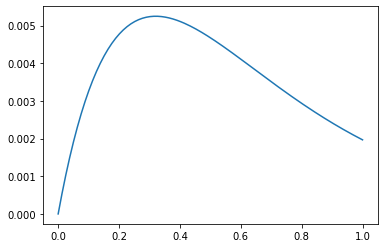

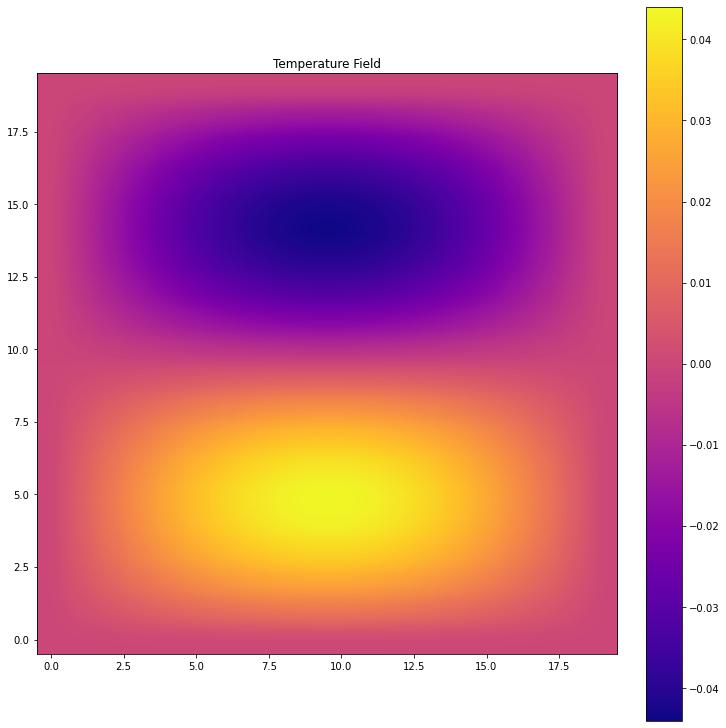

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time as clock
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
%matplotlib inline


# initial field
def init(Nd):
    for i in range(0, Nd):
        for j in range(0, Nd):
            T[i][j] = np.sin(2*np.pi*x[i])*np.sin(np.pi*y[j])
    return T
# exact field       
def exact(arg, Nd):
    for i in range(0, Nd):
        for j in range(0, Nd):
            T_exact[i][j] = np.exp(-np.pi*arg)*np.sin(2*np.pi*x[i])*np.sin(np.pi*y[j])
    return T_exact


def twodim(Nd, Pd):
    global x, y, t, T, T_exact, step_err
    print(Nd, Pd)
    alfa = np.zeros(Nd)
    beta = np.zeros(Nd)
    delta = np.zeros(Pd)

    T = np.zeros((Nd, Nd))
    T_exact = np.zeros((Nd, Nd))
    delta = np.zeros(Pd)
    
    x = np.linspace(0, 1, Nd)
    y = np.linspace(0, 1, Nd)
    t = np.linspace(0, 1, Pd)
    
    h = 1/(Nd-1)
    tau = 1/(Pd-1)
    k = 1/5/np.pi
    
    T = init(Nd)    
    m = 0
    for time in np.linspace(0, 1, Pd):
        
        T_exact = exact(time, Nd)
        delta[m] = np.max(abs(T-T_exact))
        
        m += 1
        for j in range (0, Nd):

            alfa[0] = 0
            beta[0] = 0

            for i in range (1, Nd-1):

                ai = k / h**2
                bi = 2 * k / h**2 + 1 / tau
                fi = - T[i, j] / tau

                alfa[i] = ai / (bi - ai * alfa[i - 1])
                beta[i] = (ai * beta[i - 1] - fi) / (bi - ai * alfa[i - 1])
                
            T[Nd-1, j] = 0
            
            for i in range (Nd-2, -1, -1):
                T[i,j] = alfa[i] * T[i + 1, j] + beta[i]
        
                
        for i in range(1, Nd-1):

            alfa[0] = 0
            beta[0] = 0

            for j in range (1, Nd-1):

                ai = k / h ** 2
                bi = 2 * k/ h ** 2 + 1 / tau
                fi = - T[i, j] / tau

                alfa[j] = ai / (bi - ai * alfa[j - 1])
                beta[j] = (ai * beta[j - 1] - fi) / (bi - ai * alfa[j - 1])
            
#             T[i, N-1] = (2.0 * k * tau * beta[N-1] + h**2 * T[i, N-1]) / (2.0 * k * tau * (1.0 - alfa[N-1]) + h**2)
            T[i, Nd-1] = 0
            
            for j in range (Nd-2, -1, -1):
                T[i, j] = alfa[j] * T[i, j + 1] + beta[j]

    plt.plot(t, delta)
    step_err = np.mean(delta)
    return T, delta, step_err

twodim(20, 160)

fig, ax = plt.subplots(1, 1, figsize=(10, 10), constrained_layout=True)
       
p2 = ax.imshow(T, cmap='plasma', aspect='equal', interpolation='gaussian', origin="lower")    

fig.colorbar(p2)
ax.set_title('Temperature Field')

fig.canvas.draw()




# Осталось только вывести сравнительные картинки для полей 

In [72]:
arr = np.array([[5, 10], [10, 40], [20, 160]])
for n in arr:
    print(n[0])

5
10
20


5 10
10 40
20 160
30 160
40 160


Text(0, 0.5, 'error')

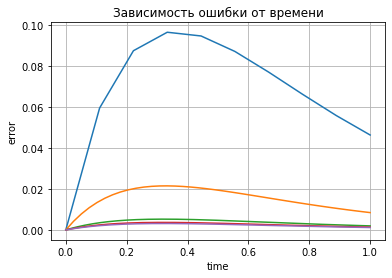

In [25]:
err_arr = np.zeros(5)

def err():
    arr = np.array([[5, 10, 1], [10, 40, 2], [20, 160, 3], [30, 160, 4], [40, 160, 5]])
    m = 0
    for n in arr:
        
        twodim(n[0],n[1])
        err_arr[m] = step_err 
        
        m += 1
    return 0
  
err()

plt.grid()
plt.title('Зависимость ошибки от времени')
plt.xlabel('time')
plt.ylabel('error')

# plt.plot(err_arr)

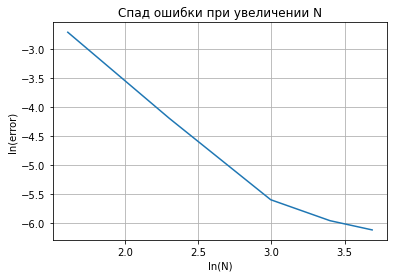

In [34]:
num_arr = [5,10,20,30,40]

plt.grid()
plt.title('Спад ошибки при увеличении N')
plt.xlabel('ln(N)')
plt.ylabel('ln(error)')
plt.plot(np.log(num_arr), np.log(err_arr))